In [2]:
### 20250416 하둡 수업~~! 이건 도커 주피터로 열어야해!!! (셀레니움은 윈도우!!)

In [1]:
!hostname -I # hdfs-mynet으로 연결!! 이제 하둡 네트워크와 같은 네트워크 쓰게됐다!!!

172.19.0.2 172.18.0.6 


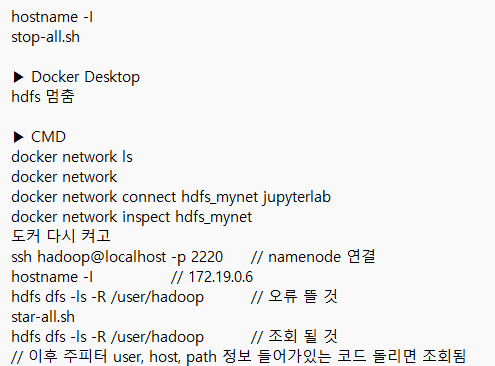

In [4]:
#!pip install hdfs

In [5]:
from hdfs import InsecureClient

In [18]:
user = "hadoop"
host = "http://namenode:9870"
path = "/user/hadoop/LICENSE.txt"
hdfs = InsecureClient(host, user=user)
with hdfs.read(path, encoding='utf-8') as reader :
    text = reader.read()
print(text[200:300])

TION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for 


In [ ]:
# 점심 먹고 이어서~ ^_^

In [14]:
#!pip install collection
#!pip install counter

In [20]:
from collections import Counter

words = text[:200].strip().split()
word_counts = Counter(words)
#print(word_count)
for word, count in word_counts.items():
    print(word,"    ", count)

Apache      1
License      1
Version      1
2.0,      1
January      1
2004      1
http://www.apache.org/licenses/      1
TERMS      1
AND      1
CONDITIONS      1
FOR      1
USE,      1
REPRODUC      1


In [21]:
# 경로 내 파일 읽어오기 !!

hdfs_dir = '/user/hadoop'
show = hdfs.list(hdfs_dir)
for s in show:
    print(s)

부산광역시구군별좌표.csv
LICENSE.txt
grep-output
starbucks_20250411123612.csv
wordcount-output


In [22]:
!pwd

/home/pkdata/pkdata


In [39]:
# 파일 업로드
local_path = './data ref/gender_submission.csv'
hdfs_path = '/user/hadoop/gender.csv'
hdfs.upload(hdfs_path, local_path, overwrite = True)
print("업로드 완료")

업로드 완료


In [42]:
# 파일 확인
hdfs_path = '/user/hadoop/gender.csv'  # 존재하지 않는 파일! 
#hdfs.status(hdfs_path, strict = False) # strict = False (없으면 표시하지 않음~)
if hdfs.status(hdfs_path, strict=False) ==None:
    print(f"{hdfs_path}의 파일이 없습니다 !")
else :
    print(hdfs.status(hdfs_path, strict = False))

/user/hadoop/gender.csv의 파일이 없습니다 !


In [41]:
hdfs_path = '/user/hadoop/'
del_file = 'gender.csv'
if hdfs.delete(hdfs_path + del_file):
    print("삭제되었습니다 !")
else :
    if hdfs.status(hdfs_path, strict=False) == None:
        print(f"{hdfs_path}의 파일이 없습니다 !")

삭제되었습니다 !


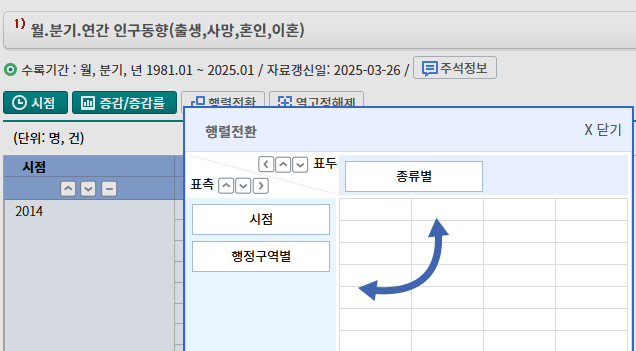

In [ ]:
# docker zepplin 이미지 및 컨테이너 생성 !!

docker run -itd --user root --name zep01 --hostname PKNU --network hdfs_mynet -p 28080:8080 -v /d/keh/code/dockerfile_data/zeppelin:/opt/zeppelin/notebook/data apache/zeppelin:0.12.0